# Loading the Datasets

In [1]:
from Model import *
import torch.nn as nn
from torch.utils.data import DataLoader
import pandas as pd

#get the data
split_ratio = 0.8
val_ratio = 0.2
data = pd.read_csv("Data/dataset_2048.csv", dtype = str)
train_df = data.sample(frac = split_ratio)
test_df = data.drop(train_df.index)
val_df = train_df.sample(frac = val_ratio)
train_df = train_df.drop(val_df.index)

train_dataset = QueueDataset(train_df)
test_dataset = QueueDataset(test_df)
val_dataset = QueueDataset(val_df)

#initialize the data loader 
train_loader = DataLoader(train_dataset, batch_size = 128, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = 128, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size = 128, shuffle = True)

# Defining the Model

In [63]:
#model hyperparameters 
ntokens = 65536  # size of vocabulary
emsize = 240  # embedding dimension
d_hid = 240  # dimension of the feedforward network model in ``nn.TransformerEncoder``
nlayers = 3  # number of ``nn.TransformerEncoderLayer`` in ``nn.TransformerEncoder``
nhead = 4 # number of heads in ``nn.MultiheadAttention``
dropout = 0.2  # dropout probability
input_size = 128
threshold = 0.5

#define the model 
device = "cpu"
transformer = RandomLM(ntokens, emsize, nhead, d_hid, nlayers, input_size, dropout).to(device)
criterion = nn.BCELoss().to(device)
optimizer = torch.optim.Adam(transformer.parameters())

/Users/rishabhgoel/Environments/Randomness_Testing/lib/python3.11/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


# Training Model

epoch: 1, batch: 100, train loss: 2.737, train macro: 0.498, train micro: 0.658, train sample: 0.597, train weighted 0.560, val loss: 0.647, val macro: 0.472, val micro: 0.658 val sample: 0.597 val weighted: 0.546
epoch: 1, batch: 200, train loss: 0.452, train macro: 0.764, train micro: 0.795, train sample: 0.714, train weighted 0.779, val loss: 0.353, val macro: 0.867, val micro: 0.870 val sample: 0.805 val weighted: 0.873
epoch: 1, batch: 300, train loss: 0.328, train macro: 0.864, train micro: 0.870, train sample: 0.789, train weighted 0.871, val loss: 0.297, val macro: 0.880, val micro: 0.885 val sample: 0.822 val weighted: 0.886
epoch: 2, batch: 100, train loss: 0.247, train macro: 0.902, train micro: 0.907, train sample: 0.825, train weighted 0.908, val loss: 0.275, val macro: 0.887, val micro: 0.893 val sample: 0.828 val weighted: 0.894
epoch: 2, batch: 200, train loss: 0.241, train macro: 0.907, train micro: 0.912, train sample: 0.840, train weighted 0.912, val loss: 0.260, val

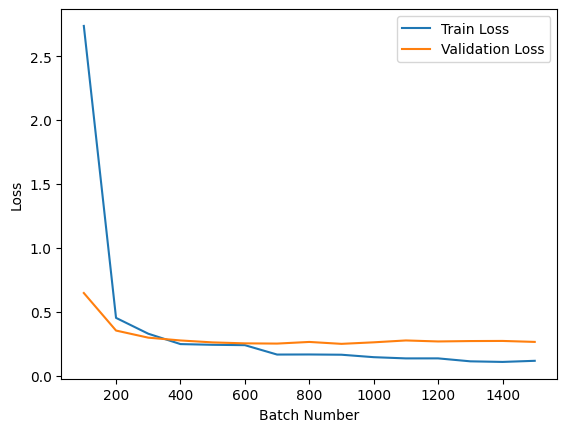

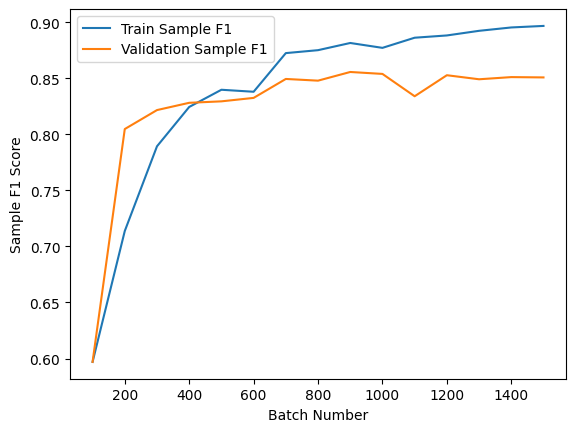

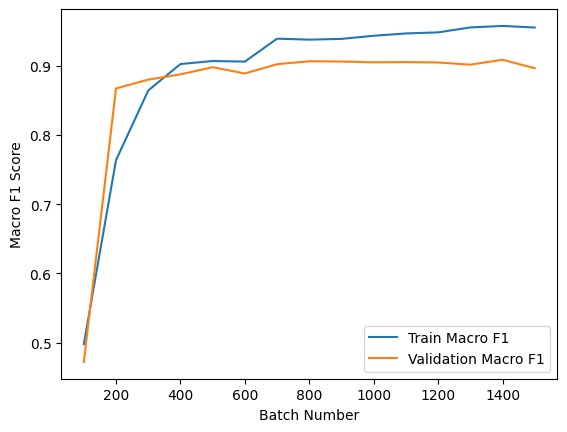

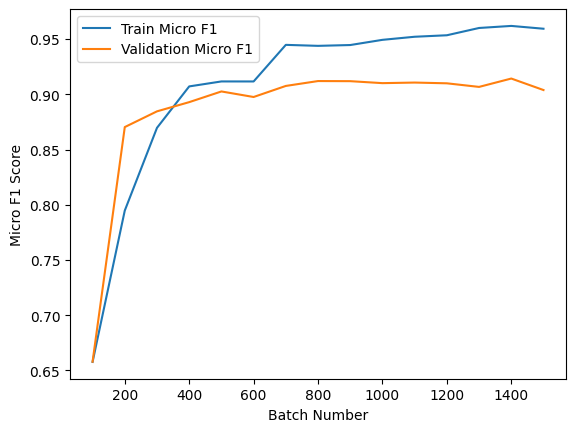

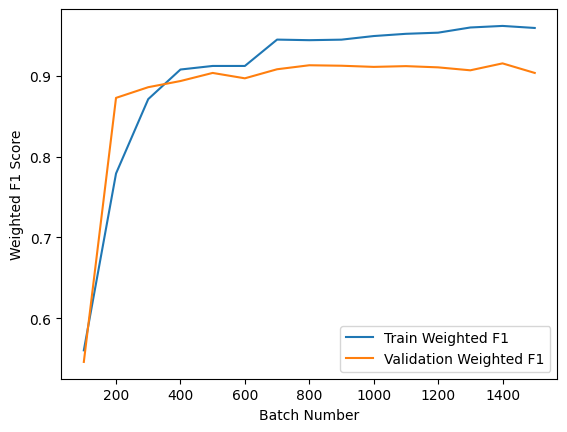

Loss: 0.294
Micro F1: 0.892
Macro F1: 0.898
Sample F1: 0.838
Weighted F1: 0.899


In [65]:
save = True 
path = str(emsize) + "embeddings-" + str(nlayers) + "encoder-" + str(nhead) + "heads-" + str(input_size) + "tokensize"

train_metrics, val_metrics = train(transformer, criterion, optimizer, train_loader, val_loader, 5, threshold)
plot_metrics(train_metrics, val_metrics)
inference(transformer, criterion, test_loader, threshold)
model_save(transformer, path, train_metrics, val_metrics)

# Pre-Trained Models

## Metrics

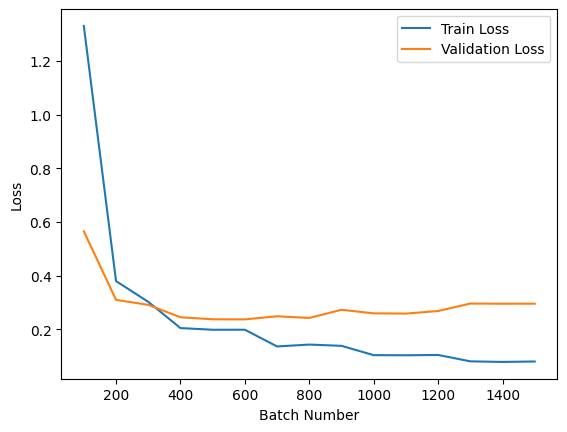

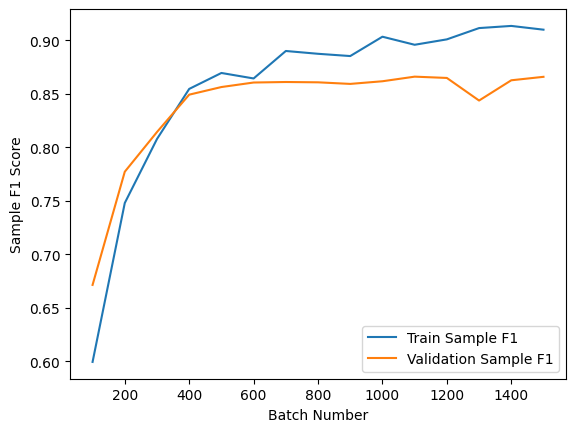

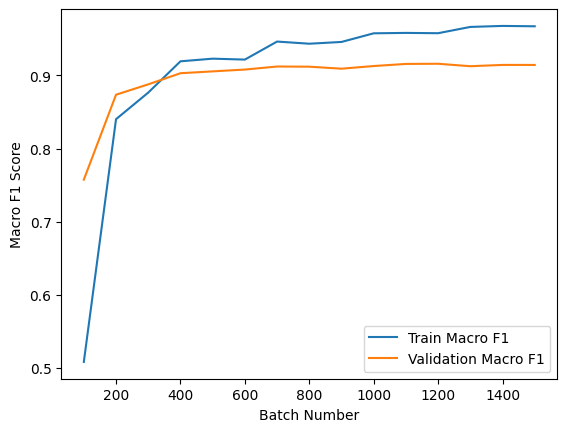

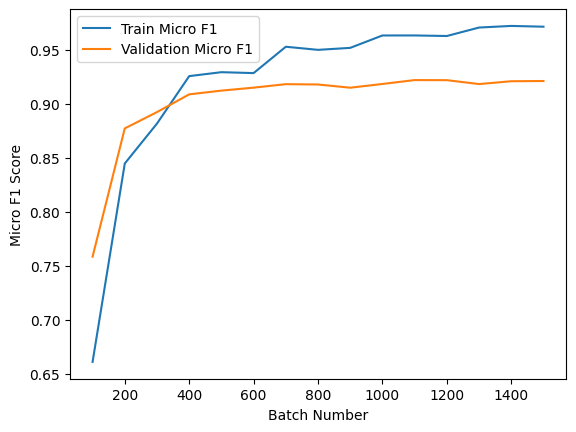

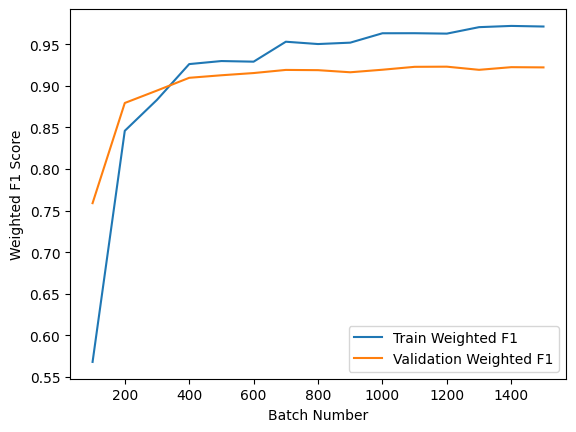

In [64]:
path = "TrainedModels/240embeddings-3encoder-8heads-128tokensize"

with ZipFile(path + ".zip", "r") as myzip:
    myzip.extractall("temp/")

train_metrics = pd.read_csv("temp/train_metrics.csv", index_col=0)
val_metrics = pd.read_csv("temp/val_metrics.csv", index_col = 0)

plot_metrics(train_metrics, val_metrics)

## Inference

In [ ]:
model = torch.load("temp/model.pth")

data_loader = None #loader for the data
inference(model, criterion, test_loader, threshold)

In [66]:
os.remove("temp/train_metrics.csv")
os.remove("temp/val_metrics.csv")
if (os.path.exists("temp/model.pth")):
    os.remove("temp/model.pth")
else: 
    os.remove("temp/model.pt")
os.rmdir("temp")